In [2]:
import os
from rps.dataclass import Path, Point, Graph
import numpy as np
from rps.utils import alg_test, classical_test
from rps.aco import *
from rps.classical import *
from multiprocessing import freeze_support

In [3]:
if __name__ == '__main__':
    freeze_support()
    
    filename = 'test5'
    
    graph = Graph()
    graph.load(filename)
    
    alg1 = AS(nc=50, m=50, beta=0)
    res1 = alg_test(alg1, graph, patch_num=20)

    alg2 = MAACO(m=50, nc=50)
    res2 = alg_test(alg2, graph, patch_num=20)

    alg3 = IHMACO(m=50, nc=50)
    res3 = alg_test(alg3, graph, patch_num=20)

    alg4 = MHACO(m=7, nc=50)
    res4 = alg_test(alg4, graph, patch_num=20)

    alg5 = Dijkstra()
    res5 = classical_test(alg5, graph)
    print('Dijkstra finished.')

    alg6 = A_Star()
    res6 = classical_test(alg6, graph)
    print('A_star finished.')


Task 0 finished. (66.91168824543138, 28, 47)
Task 1 finished. (76.0832611206852, 48, 46)
Task 2 finished. (70.0832611206852, 37, 38)
Task 3 finished. (73.8406204335659, 38, 47)
Task 4 finished. (76.0832611206852, 46, 12)
Task 5 finished. (72.6690475583121, 41, 47)
Task 6 finished. (76.08326112068518, 44, 28)
Task 7 finished. (71.25483399593901, 36, 34)
Task 8 finished. (72.18376618407355, 44, 17)
Task 9 finished. (72.0832611206852, 40, 36)
Task 10 finished. (69.49747468305829, 39, 29)
Task 11 finished. (73.49747468305827, 38, 30)
Task 12 finished. (70.66904755831209, 35, 47)
Task 13 finished. (69.59797974644663, 43, 32)
Task 14 finished. (75.254833995939, 42, 50)
Task 15 finished. (72.0832611206852, 39, 43)
Task 16 finished. (70.76955262170044, 37, 35)
Task 17 finished. (67.59797974644664, 31, 45)
Task 18 finished. (70.66904755831209, 42, 34)
Task 19 finished. (71.49747468305829, 36, 32)
Task 0 finished. (59.25483399593901, 15, 44)
Task 1 finished. (60.6690475583121, 14, 14)
Task 2 fin

In [4]:
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
df = pd.concat([res1, res2, res3, res4, res5, res6], axis=1)
# df = pd.concat([res1, res2, res3], axis=1)
# atex_table = df.to_latex(index=True, escape=False)
df_t = df.T

In [5]:
df_t

,Best Length,Mean Length,Std Length,Best Turn,Mean Turn,Std Turn,Best Converge,Mean Converge,Std Converge
AS,66.91,71.92,2.58,28.00,39.20,4.73,12.00,36.45,10.09
MAACO,59.25,59.99,0.64,11.00,14.45,2.60,10.00,25.95,11.27
IHMACO,59.25,59.70,0.38,11.00,13.60,2.13,17.00,23.60,6.53
MHACO,58.67,58.78,0.35,11.00,12.75,1.44,2.00,22.70,13.51
Dijkstra,58.67,58.67,0.00,19.00,19.00,0.00,NaN,NaN,NaN
A_Star,58.67,58.67,0.00,13.00,13.00,0.00,NaN,NaN,NaN


In [6]:
import re
latex = df_t.to_latex(escape=False, index=True, float_format="{:.2f}".format)
patterns_to_replace = (
    ("Best\s+\w+", "Best"),
    ("Mean\s+\w+", "Mean"),
    ("Std\s+\w+", "Std.")
)
for pattern, replacement in patterns_to_replace:
    latex = re.sub(pattern, replacement, latex)
    
head = r"""\begin{table}[htbp]
\centering
\caption{仿真实验1中MHACO与其他算法的结果比较}
\label{tab:test1}
\begin{tabular}{lrrrrrrrrr}
\toprule
\multirow{2}{*}{Algorithm} & \multicolumn{3}{c}{Path length} & \multicolumn{3}{c}{Turn times} & \multicolumn{3}{c}{Convergence iterations}\\
\cline{2-4} \cline{5-7} \cline{8-10}"""

res = latex.replace('NaN', '-')
res = res.replace('A_Star', 'A*')
res = res.replace('AS', 'ACO')
res = res.replace('\\begin{tabular}{lrrrrrrrrr}\n\\toprule', head)
res += '\\end{table}'
print(res)

\begin{table}[htbp]
\centering
\caption{仿真实验1中MHACO与其他算法的结果比较}
\label{tab:test1}
\begin{tabular}{lrrrrrrrrr}
\toprule
\multirow{2}{*}{Algorithm} & \multicolumn{3}{c}{Path length} & \multicolumn{3}{c}{Turn times} & \multicolumn{3}{c}{Convergence iterations}\\
\cline{2-4} \cline{5-7} \cline{8-10}
 & Best & Mean & Std. & Best & Mean & Std. & Best & Mean & Std. \\
\midrule
ACO & 66.91 & 71.92 & 2.58 & 28.00 & 39.20 & 4.73 & 12.00 & 36.45 & 10.09 \\
MAACO & 59.25 & 59.99 & 0.64 & 11.00 & 14.45 & 2.60 & 10.00 & 25.95 & 11.27 \\
IHMACO & 59.25 & 59.70 & 0.38 & 11.00 & 13.60 & 2.13 & 17.00 & 23.60 & 6.53 \\
MHACO & 58.67 & 58.78 & 0.35 & 11.00 & 12.75 & 1.44 & 2.00 & 22.70 & 13.51 \\
Dijkstra & 58.67 & 58.67 & 0.00 & 19.00 & 19.00 & 0.00 & - & - & - \\
A* & 58.67 & 58.67 & 0.00 & 13.00 & 13.00 & 0.00 & - & - & - \\
\bottomrule
\end{tabular}
\end{table}


Length: 58.67
Length: 58.67
Length: inf


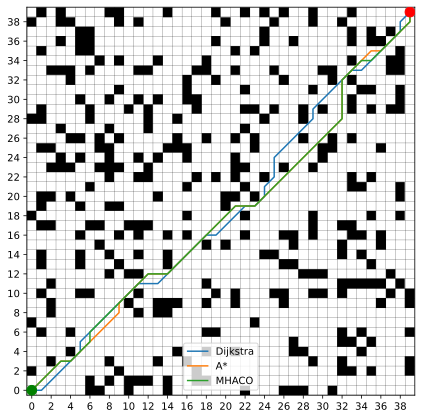

In [19]:
%config InlineBackend.figure_format = 'svg'
from rps.dataclass.canvas import Map
from rps.aco import *
from rps.classical import *

map = Map()
map.load(filename)

def run_group(opt):
    if opt == 1:
        map.apply(alg1, label='ACO')
        map.apply(alg2)
        map.apply(alg3)
        map.apply(alg4, 1)
    else:
        map.apply(alg5)
        map.apply(alg6, label='A*')
        map.apply(alg4, 1)

run_group(2)

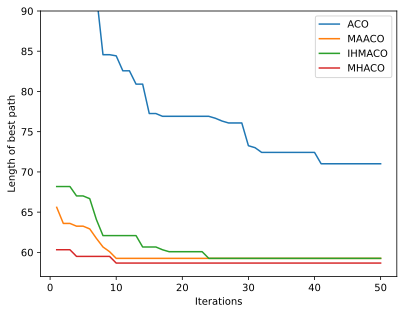

In [16]:
import matplotlib.pyplot as plt
data1 = alg1.length_history
data2 = alg2.length_history
data3 = alg3.length_history
data4 = alg4.length_history
x_data = range(1, 51)
plt.plot(x_data, data1, label='ACO')
plt.plot(x_data, data2, label='MAACO')
plt.plot(x_data, data3, label='IHMACO')
plt.plot(x_data, data4, label='MHACO')
plt.xlabel('Iterations')
plt.ylabel('Length of best path')
plt.ylim(bottom=57, top=90)
plt.legend()